# Projet ADEME : groupe 1

# Table of contents 
1. [Contextualization](#contextualization)
2. [Definition of the scope of the problem ](#definition-of-the-scope-of-the-problem)
3. [Study of the problem complexity](#study-of-the-problemcomplexity)
4. [Modeling the problem](#modeling-the-problem)

## 1. Contextualization

With the aim of improving transport modes and reducing pollution, ADEME recently launched a call for expressions of interest. The aim is to promote the realization of demonstrators and experiments of new mobility solutions for people and goods adapted to different types of territories.

Being known in the field of Intelligent Multimodal Mobility our company, **CesiCDP**, has responded to the call for tender of ADEME.

## 2. Definition of the scope of the problem 
### a) Rephrasing the problem: 

So our goal is to find a route through all the delivery points, while making sure to return to the starting point, and taking as little time as possible.

### b) Reminder of the objectives of the study:

Therefore, first of all, we need to generate a delivery route, by a graph, we can consider **cities as vertices** and **road axes as edges** of our graph.
Following this, we must optimize the traffic between each road axis, and to do this, we will perform a statistical study of the traffic behavior.

### c) Explanation of constraints:

<p>The main constraint of our problem is to pass through all the delivery points and make sure to be able to return to the starting point, to the vehicules' warehouse.
Moreover, we have chosen to force the passage through storage warehouses to recover the objects to be delivered, before the delivery round.</p>
<p>We also made the choice to get multiple trucks going.</p>

## 3. Study of the problem complexity

The **Traveling Salesman Problem** (TSP) is a **NP-hard** problem and the TSPTW (Traveling Salesman Problem with Time Windows) is its variant due to the addition of the time window constraint. 

>**Our problem** being the same as the TSP, we know that it is **NP-hard** too. The difference is the addition of the delivery time constraint.

Indeed, with this constraint we obtain a different complexity but it does not change much, not influencing its type: our problem remains **NP-hard**. 

> This means that there is no deterministic algorithm that can solve this problem in polynomial time.
This complexity also extends to our time-window vehicle tour problem.

### a) Identification of the problem to an already known study problem:

The already known study problem we found in common with our probllematic is the "Vehicle Tour Problem with Time Window". It is an extension of the "Vehicle Tour Planning Problem" (first tackled and defined by Danzig and Ramser (1959)), which consists of determining the tours of a fleet of vehicles in order to deliver a list of customers, or to perform service or visit tours. 

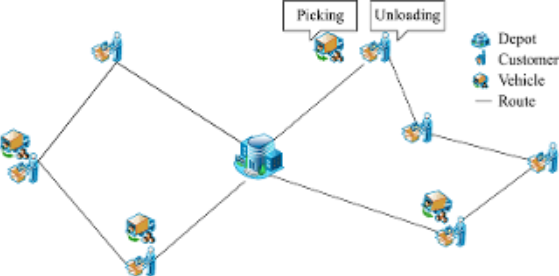
<center><strong>Figure 1 - </strong>Vehicle Tour Problem with Pickup and Delivery Scheme</center>

Pickup and Delivery Problems (PDP), also known as Vehicle Routing Problem with Pickup and Delivery (VRPPD) or Pickup and Delivery Vehicle Routing Problem (PDVRP) have been described and discussed in Savelsbergh's seminal paper [Savelsbergh et al., 1995] and, more recently, by Berbeglia [Berbeglia et al., 2007] and [Parragh et al., 2008], in their static versions.

###  b) Mathematical definition of the problem: 

In order to set up the problem, we have established its different characteristics:

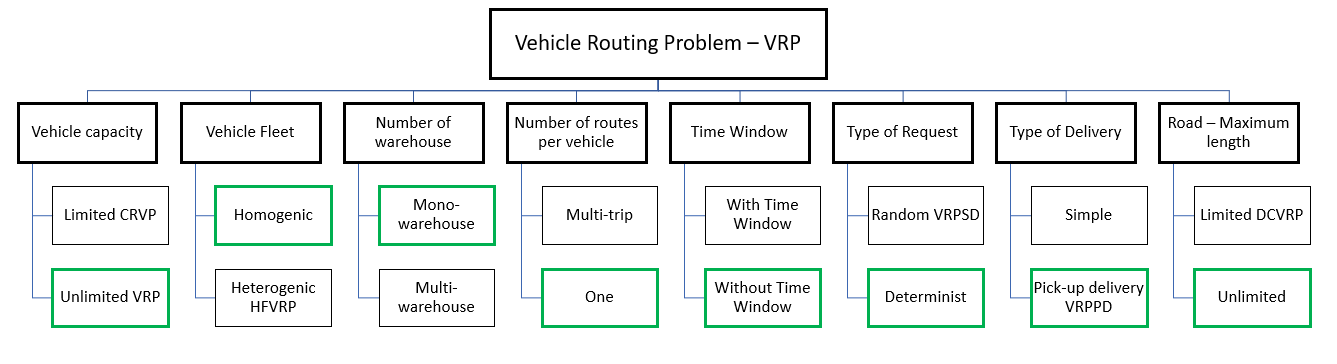
<center><strong>Figure 2 - </strong>VRP Characteristics </center>

The green boxes show our choice of features.
In this way our problem could be formulated: 
A truck transporting any type of object and of unlimited capacity, has a determined route to make its delivery but must first pass through all the warehouses of the objects it will have to deliver in its tour.

How can we make the delivery tour in a minimum distance?

#### Informations:

> We have a collection **<code>X={x<sub>i</sub>}</code>** of object types, and a warehouse for each object.
>
> We have an undirected graph, **<code>G = (S, A)</code>**, where :
> - <code>S = {0,1,2,...n}</code> 
> Representing the number of summits, summit 0 corresponds to the warehouse where the fleet of vehicles is positioned.
> - <code>A = {(i,j)}</code> such that <code>i</code> is different from <code>j</code>, and <code>i,j ∈ S </code>representing the set of arcs between the summits.
>
> A summit can be considered either a collection point or a delivery point.


### Resolution of this optimization problem

In order to resolve this optimization problem, we have to follow those steps :

#### **1. Identify the parameters of the problem.**

- $n$ = Number of cities
- $k$ = Number of trucks
- $d_{ij}$ = Distance of travel from node $i$ to node $j$

#### **2. Define the binary variable.**

- ${x}_{ijk}$ = 1 if the truck $k$ travels from node $i$ to $j$
- ${x}_{ijk} \in$ {0,1} $\forall k \in$ {1,...,p}, $i,j \in$ {1,...,n}
- ${x}_{ijk}$ = 0 if there is no travel from a node to itself

#### **3. Define the objective function.**

$$Min \sum_{i=1}^{p}\sum_{j=1}^{n}\sum_{k=1}^{n}d_{ij}x_{ijk}$$

#### **4. Translate the constraints of the situation in a inequation system.**

- Ensure that the number of times a truck enters a node is equal to the number of times it leaves that node.
<center>$\sum_{i=1}^{n}x_{ijk} = \sum_{i=1}^{n}x_{ijk} \forall j \in \{1,...,n\}, k\in \{1,...,p\}$</center>

- Together with the first constraint, it ensures that the every node is entered only once, and it is left by the same vehicle.
$$\sum_{k=1}^{p}\sum_{i=1}^{n}x_{ijk}=1$$ $$\forall j \in \{2,...,n\}$$

- Together with constraint 1, we know that every vehicle arrives again at the depot.
$$\sum_{j=2}^{n}x_{1ijk} = 1 \forall k \in \{1,...,p\}$$

- Respect the capacity of the vehicles. Note that all vehicles have the same capacity.
$$\sum_{i=1}^{n}\sum_{j=2}^{n}q_{j}x_{ijk} \leq Q$$ $$\forall k \in \{1,...,p\}$$

#### **5. Choose the meta-heuristic.**

We made the choice to focus more on one meta-heuristic : the tabu search.

##### a. Tabu search

Developed in a particular framework by Glover in 1986 (and independently by Hansen in 1986), it is a heuristic local search method used to solve complex and / or very large (often NP-hard) problems.

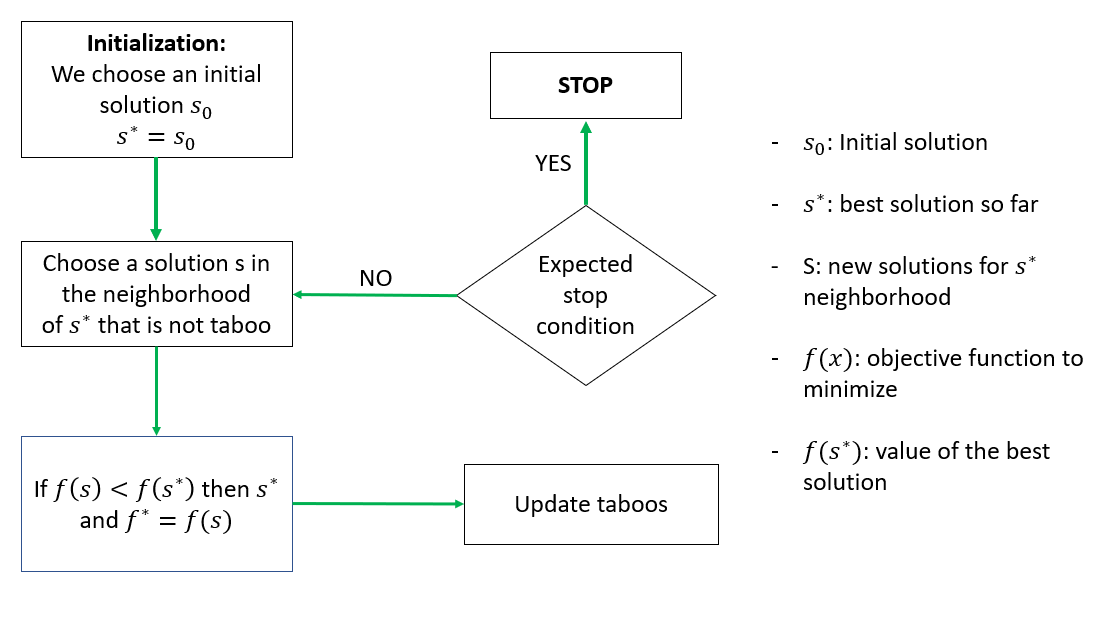
<center><strong>Figure 3 - </strong>Tabu search overview</center>


###### Basis:
- Pursue the search for solutions even when a local optimum is met and this:
    - By allowing trips that do not improve the solution
    - Using the principle of memory to avoid backtracking (cyclical movements)
    
###### Why did we chose the tabu search ?

We did the choice of the tabu search because it's faster and consume less resources than the Genetic Algorithm for instance. Another argument is that adapting our context in a Genetic Algorithm is way harder because of all the populations aspect than in a tabu search.

## References

- Thomas Chabot - "RÉSOLUTION DES PROBLÈMES DE TOURNÉES DE VÉHICULES POUR LE TRANSPORT DES ÉCHANTILLONS BIOMÉDICAUX AU QUÉBEC" https://corpus.ulaval.ca/jspui/bitstream/20.500.11794/26365/1/31447.pdf (2015)

- Martin Savelsbergh - "The General Pickup and Delivery Problem" https://www.researchgate.net/publication/239063487_The_General_Pickup_and_Delivery_Problem (February 1995)

- Gerardo Berbeglia - "Static pickup and delivery problems: A classification scheme and survey" https://www.researchgate.net/publication/24065469_Static_pickup_and_delivery_problems_A_classification_scheme_and_survey (February 2007)

- Sophie N. Parragh, Karl F. Doerner, Richard F. Hartl - A survey on pickup and delivery problems: Part I: Transportation between customers and depot https://www.researchgate.net/publication/233561127_A_survey_on_pickup_and_delivery_problems_Part_I_Transportation_between_customers_and_depot (April 2008)

- XU Jian - "Modèles stochastiques évolutionnaires pour la gestion de tournées de véhicules avec fenêtres de temps souples et demandes floues" https://www.lgi2a.univ-artois.fr/spip/IMG/pdf/these_jian_xu.pdf (december 2007)

- Gaurang Panchal "Solving NP hard Problems using Genetic Algorithm"
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.735.8064&rep=rep1&type=pdf (2015)

